# P.C.A.

In [3]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
import math 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False



In [4]:
data=pd.read_csv('star.txt',sep='\s+')

In [5]:
x=np.array(data.F606W-data.F814W)
y=np.array(data.F606W)

In [6]:
data.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [7]:
notar=data.drop(columns=['Sharp','#ID'])

In [26]:
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [27]:
VAR=pca.explained_variance_ratio_

In [28]:
VAR.sum()

0.9999995319221332

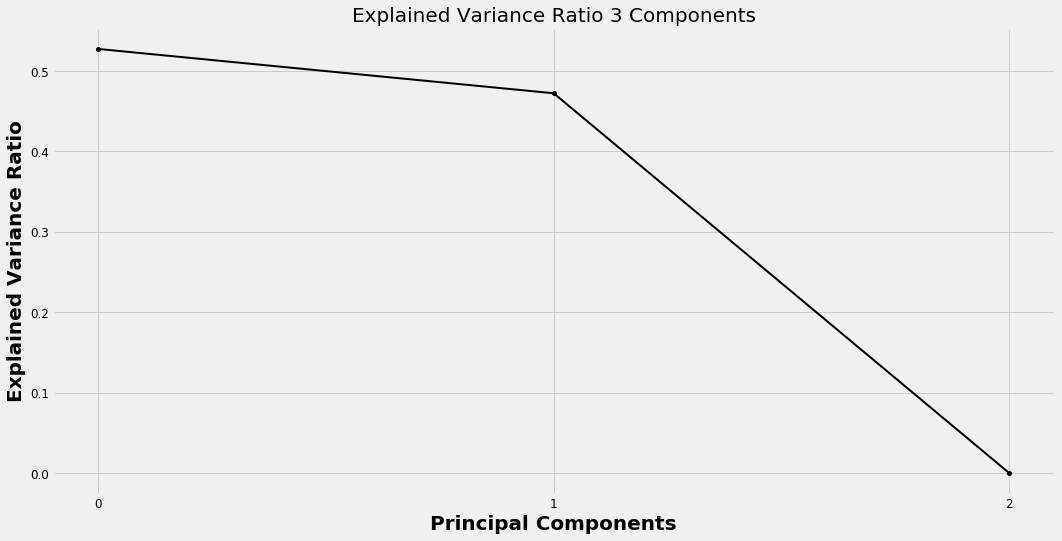

In [21]:
plt.title('Explained Variance Ratio 3 Components',fontsize=20)
plt.ylabel('Explained Variance Ratio',fontsize=20)
plt.xlabel('Principal Components',fontsize=20)
plt.plot(VAR,marker='.',color='k')
plt.xticks(np.arange(0,3,1))
plt.grid(True)

In [7]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [12]:
pca_data.tail()

,FirstComponent,SecondComponent,ThirdComponent
51475,-2595.533534,4352.168882,-2.548815
51476,-2608.235077,4339.799052,2.189038
51477,-2706.797907,4214.351512,-3.699351
51478,-3666.679220,2983.957433,-4.293191
51479,-3977.662877,2587.956795,-0.506620


In [13]:
notar.corr()

,X,Y,F606W,error,F814W,error.1,Chi
X,1.000000,0.053451,-0.096873,-0.081905,-0.103088,-0.075036,0.036013
Y,0.053451,1.000000,-0.154213,-0.112309,-0.162024,-0.103044,0.043035
F606W,-0.096873,-0.154213,1.000000,0.560325,0.981704,0.516773,0.041261
error,-0.081905,-0.112309,0.560325,1.000000,0.565141,0.800688,0.249743
F814W,-0.103088,-0.162024,0.981704,0.565141,1.000000,0.572660,0.044171
error.1,-0.075036,-0.103044,0.516773,0.800688,0.572660,1.000000,0.276366
Chi,0.036013,0.043035,0.041261,0.249743,0.044171,0.276366,1.000000


In [14]:
pca_data.corr()

,FirstComponent,SecondComponent,ThirdComponent
FirstComponent,1.000000e+00,3.600011e-16,8.911462e-17
SecondComponent,3.600011e-16,1.000000e+00,2.532462e-16
ThirdComponent,8.911462e-17,2.532462e-16,1.000000e+00


In [15]:
COL_NAMES=pca_data.columns.tolist()

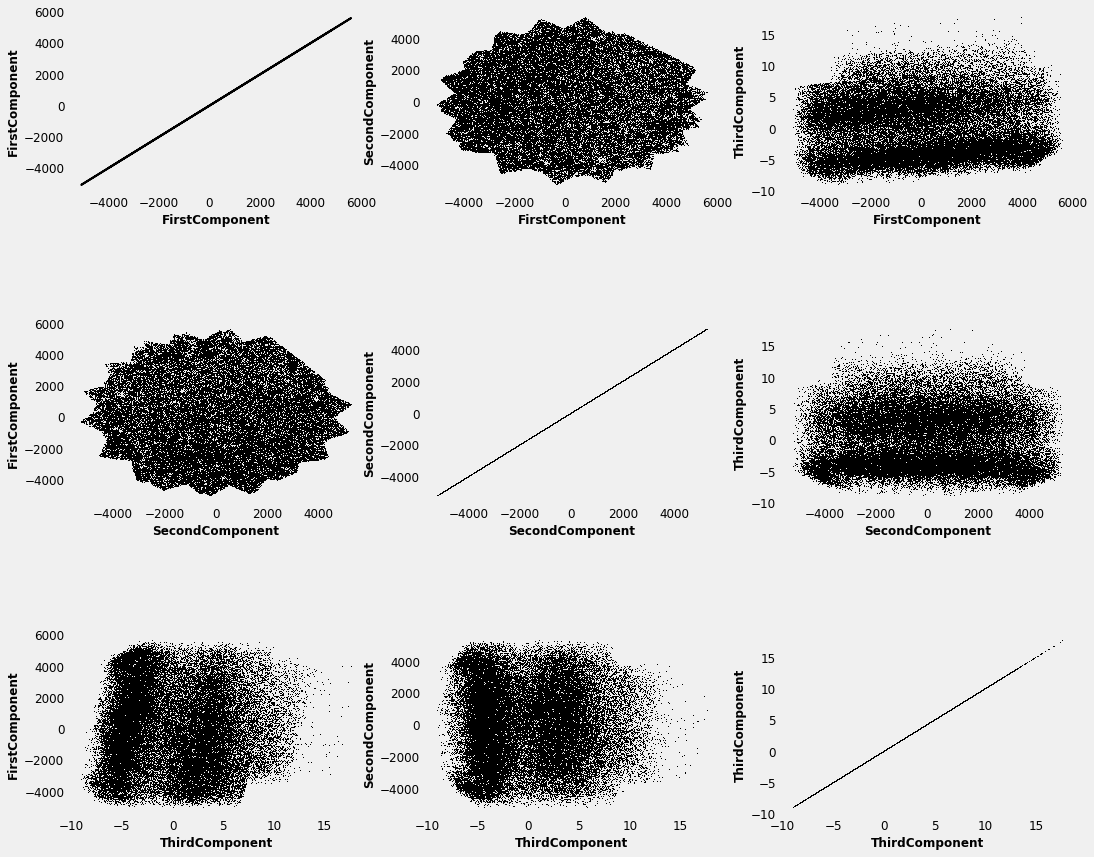

In [16]:
k=1
for i in range(3):
    col=COL_NAMES[i]
    for j in range(3):
        if k==1:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            plt.plot(pca_data[col],pca_data[COL_NAMES[j]],color='k')
            plt.xlabel(COL_NAMES[i])
            plt.ylabel(COL_NAMES[j])
        else:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            plt.plot(pca_data[col],pca_data[COL_NAMES[j]],',',color='k')
            plt.xlabel(COL_NAMES[i])
            plt.ylabel(COL_NAMES[j])

        k=k+1


# P.C.A. Excluding Space

In [6]:
notar=data.drop(columns=['Sharp','#ID','X','Y'])

In [9]:
notar.head()

,F606W,error,F814W,error.1,Chi
0,28.197,0.1036,27.127,0.1068,6.106
1,20.843,0.0552,19.815,0.0661,10.690
2,27.014,0.2194,26.068,0.1349,10.651
3,30.193,0.3641,28.270,0.1636,4.059
4,28.935,0.1669,28.941,0.2464,4.274


In [7]:
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [8]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [22]:
COL_NAMES=pca_data.columns.tolist()

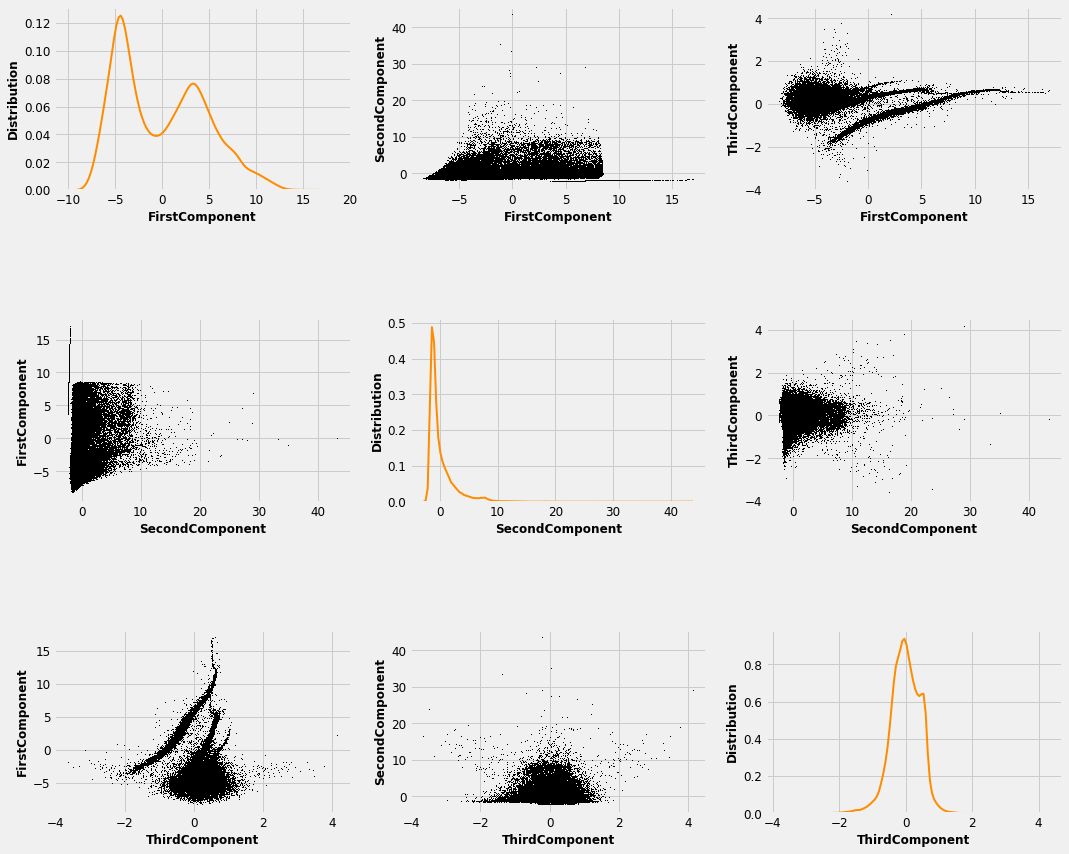

In [19]:
k=1
q=0
for i in range(3):
    col=COL_NAMES[i]
    for j in range(3):
        if k==1 or k==5 or k==9:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            sns.kdeplot(pca_data[COL_NAMES[i]],color='darkorange')
            #g._legend.remove()
            plt.grid(True)
            plt.xlabel('Values')
            plt.legend([],[], frameon=False)

            plt.xlabel(COL_NAMES[i])
            plt.ylabel('Distribution')
            #plt.ylabel(COL_NAMES[j])
        else:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            plt.plot(pca_data[col],pca_data[COL_NAMES[j]],',',color='k')
            plt.xlabel(COL_NAMES[i])
            plt.ylabel(COL_NAMES[j])
            plt.grid(True)

        k=k+1

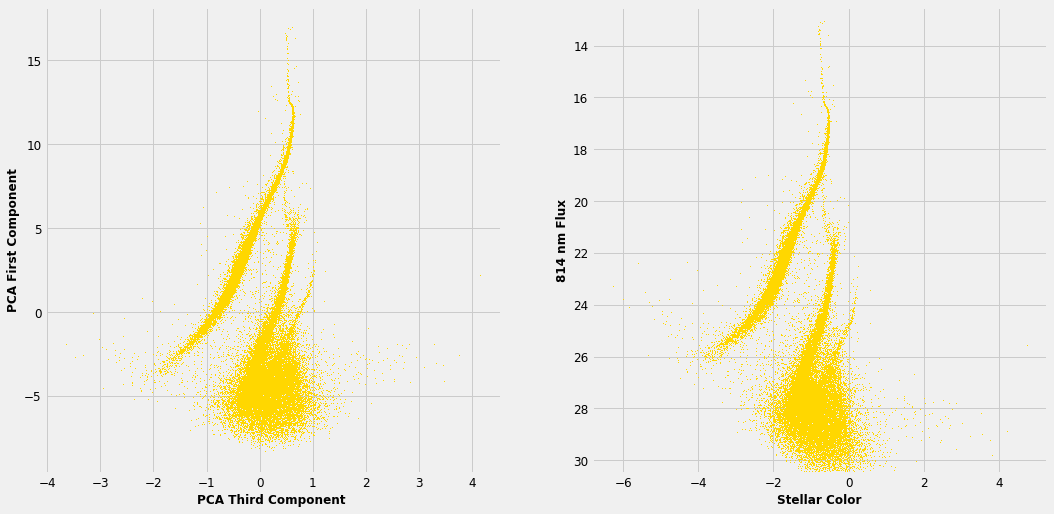

In [20]:
plt.subplot(1,2,1)
plt.plot(pca_data['ThirdComponent'],pca_data['FirstComponent'],',',color='gold')
plt.xlabel('PCA Third Component ')
plt.ylabel('PCA First Component')
plt.grid(True)
plt.subplot(1,2,2)
plt.ylim(30.5,12.5)
plt.ylabel('814 nm Flux')
plt.xlabel('Stellar Color')
plt.plot(np.array(data['F814W']-data['F606W']),data.F814W,',',color='gold')
plt.grid(True)

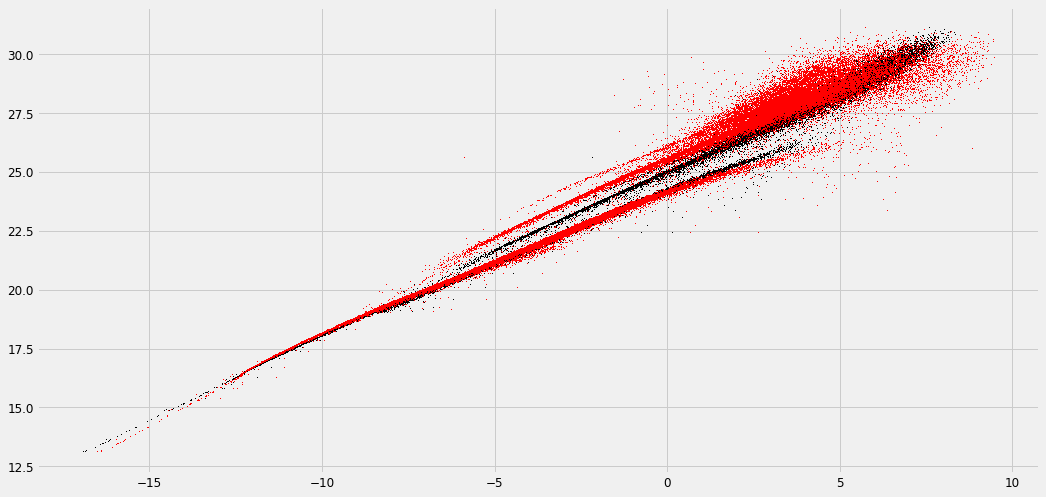

In [21]:
plt.plot(-pca_data.FirstComponent,data.F814W,',',color='k')
plt.plot((data.F606W-26.5)*1.3+5*data.error,data.F814W,',',color='red')
##plt.plot((data.F606W-26.2)*1.3-data.error,data.F814W,',',color='purple')

#plt.plot(-pca_data.FirstComponent,data.F606W,',',color='red')
plt.grid(True)

In [22]:
from sklearn.metrics import mean_squared_error

In [37]:
A=np.arange(1,3,0.1)
B=np.arange(-30.5,-22.5,0.5)
C=np.arange(-15,15,1)
orig=-pca_data.FirstComponent
max_pca=np.abs(-pca_data.FirstComponent.max())
RMSE=[]
TRIPLET=[]
for a in A:
    
    for b in B:
        for c in C:
            recons=(data.F606W+b)*a+c*data.error
            RMSE.append(np.sqrt(mean_squared_error(recons,orig)))
            TRIPLET.append([a,b,c])

In [38]:
#np.array(RMSE).argmin()
a_opt=TRIPLET[np.array(RMSE).argmin()][0]
b_opt=TRIPLET[np.array(RMSE).argmin()][1]
c_opt=TRIPLET[np.array(RMSE).argmin()][2]
r_opt=(data.F606W+b_opt)*a_opt+c_opt*data.error

In [39]:
D=np.arange(-10,10,0.1)
BEST_RMSE=[]
for d in D:
    recons=r_opt+d*data.F814W
    BEST_RMSE.append(np.sqrt(mean_squared_error(recons,orig)))

In [40]:
BEST_RMSE=np.array(BEST_RMSE)

In [42]:
d_opt=D[BEST_RMSE.argmin()]

In [43]:
r_opt=(data.F606W+b_opt)*a_opt+c_opt*data.error+d_opt*data.F814W

In [44]:
E=np.arange(-10,10,1)
BEST_RMSE=[]
for e in E:
    recons=r_opt+e*data['error.1']
    BEST_RMSE.append(np.sqrt(mean_squared_error(recons,orig)))

In [45]:
BEST_RMSE=np.array(BEST_RMSE)

In [46]:
e_opt=E[np.array(BEST_RMSE).argmin()]

In [47]:
r_opt_first=r_opt+e_opt*data['error.1']

In [48]:
first_RMSE=np.array(BEST_RMSE).min()/max_pca

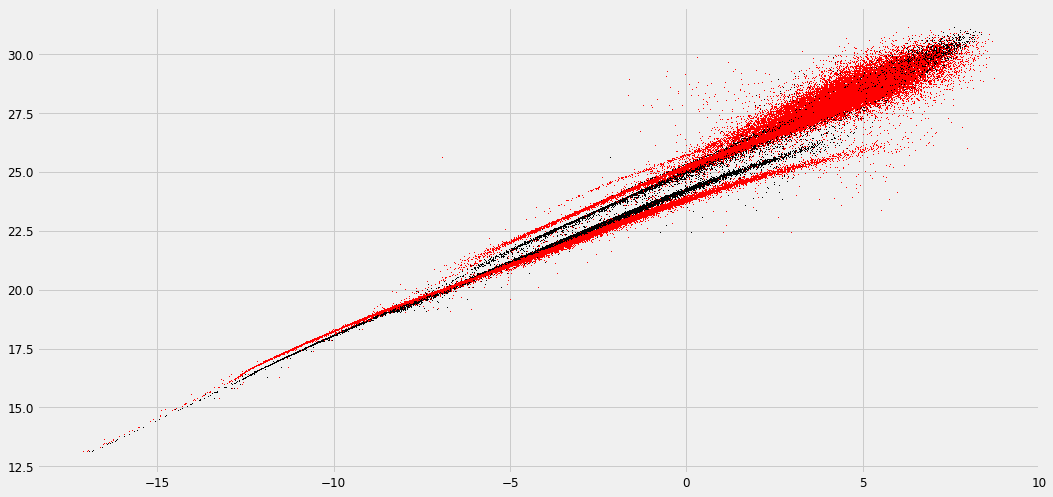

In [49]:
plt.plot(-pca_data.FirstComponent,data.F814W,',',color='k')
plt.plot(r_opt,data.F814W,',',color='red')
plt.grid(True)

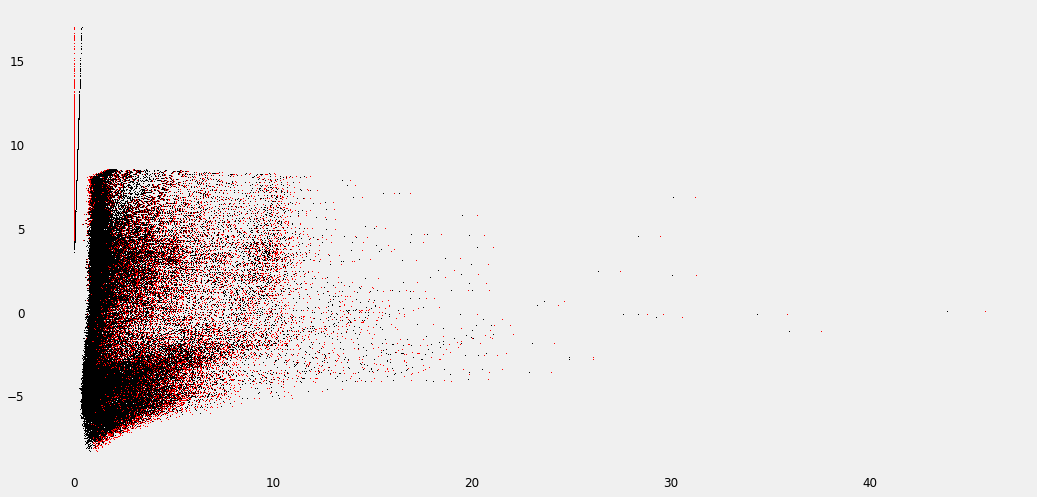

In [50]:
#plt.plot(np.array(data.Chi),np.array(data.F814W-data.F606W),',')
plt.plot(np.array(data.Chi),pca_data['FirstComponent'],',',color='red')
plt.plot(pca_data.SecondComponent*0.96+2.276,pca_data['FirstComponent'],',',color='black')

In [51]:
r_opt_sec=pca_data.SecondComponent*0.96+2.276

In [52]:
second_RMSE=np.sqrt(mean_squared_error(pca_data.SecondComponent*0.96+2.276,data.Chi))/data.Chi.max()

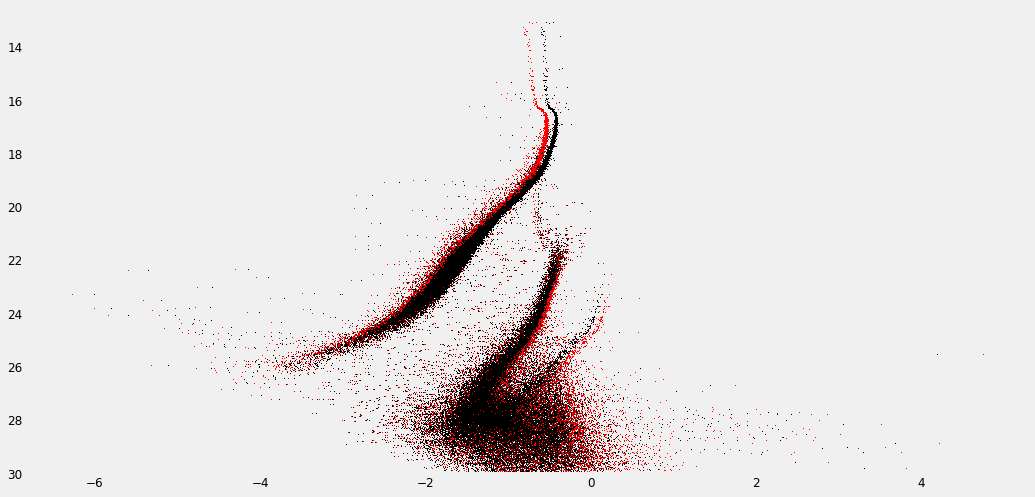

In [53]:
plt.ylim(30.0,12.5)
plt.plot(np.array(data['F814W']-data['F606W']),data.F814W,',',color='red')
plt.plot(-1.24+1.31*pca_data.ThirdComponent,data.F814W,',',color='k')

In [54]:
r_opt_third=-1.24+1.31*pca_data.ThirdComponent

In [55]:
third_RMSE=np.sqrt(mean_squared_error(-1.24+1.31*pca_data.ThirdComponent,np.array(data.F814W-data.F606W)))

In [56]:
third_RMSE=third_RMSE/np.array(data['F814W']-data['F606W']).max()

In [57]:
pca_data['X']=data.X
pca_data['Y']=data.Y

In [58]:
pca_data['Sharp']=data.Sharp

In [59]:
pca_data.head()

,FirstComponent,SecondComponent,ThirdComponent,X,Y,Sharp
0,-3.348246,3.558359,0.052565,4462.947,140.859,0.7310
1,6.885136,8.439184,0.189286,5002.486,186.138,0.4000
2,-1.896787,8.148357,0.145220,5003.574,195.421,0.1940
3,-5.504066,1.449171,-0.564914,4448.493,207.417,-1.9585
4,-5.110070,1.678896,0.804773,5040.717,224.366,-0.7720


In [60]:
#pca_data=pca_data.drop(columns=['Sharp'])

In [61]:
PCA_COL_NAMES=pca_data.columns.tolist()